# Set up

Importing libraries

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import random 
from matplotlib import gridspec
import matplotlib.pyplot as plt
import joblib
import sys
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


Import of data set and misc set up

In [3]:
sns.set()
random.seed(1234)
data = pd.read_csv("card.csv",skiprows=[1],index_col=[0])
header = pd.read_csv('card.csv', index_col=0, nrows=2).iloc[0,:].values.tolist()

# Introduction of dataset

Peek at dataset (first 5 rows)

In [18]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Number of rows & columns of dataset
Rows: 30,000
Columns: 24

In [19]:
data.shape

(30000, 24)

Summary statistics

In [20]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Exploratory data analysis

Check for missing values within dataset

There are no missing values

In [21]:
data.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

Number of fradulent and valid transactions

In [4]:
print("Fraudulent Cases: " + str(len(data[data['Y']  == 1])))
print("Valid Transactions: " + str(len(data[data['Y']  == 0])))
print("Proportion of Fraudulent Cases: " + str(len(data[data['Y']  == 1])/ data.shape[0]))

Fraudulent Cases: 6636
Valid Transactions: 23364
Proportion of Fraudulent Cases: 0.2212


Barchart of number of fradulent and valid cases

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

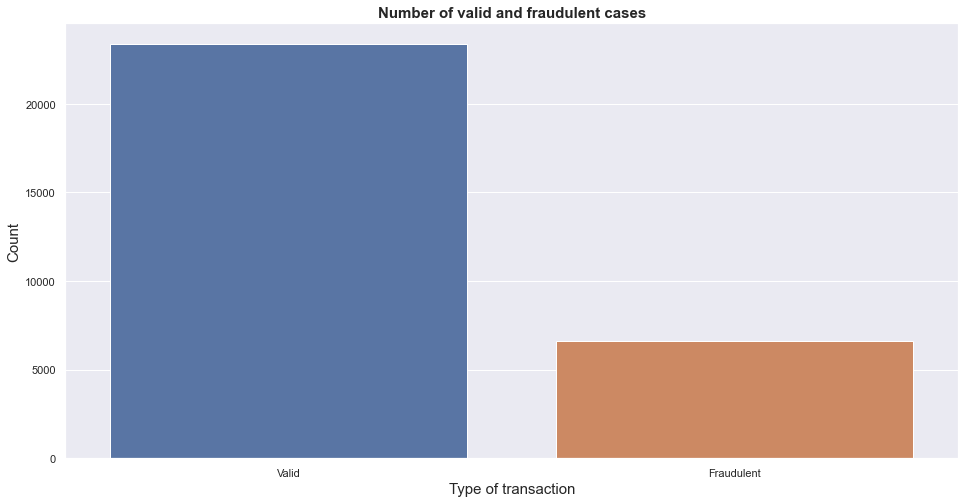

In [5]:
plt.figure(figsize = (16,8))
ax = sns.countplot(data = data, x = 'Y')
plt.title('Number of valid and fraudulent cases', fontsize=15, weight = 'bold')
plt.xlabel('Type of transaction', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ticks = [0,1], labels = ['Valid', 'Fraudulent'])
abs_values = data['Y'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels=abs_values)
plt.show()

From the bar charts, it can be seen that there is a mild degree of data imbalance between the two classes. As such, we will focus more on F-1 scores and Harmonic means when evaluating the models.

Barchart of defaults by gender

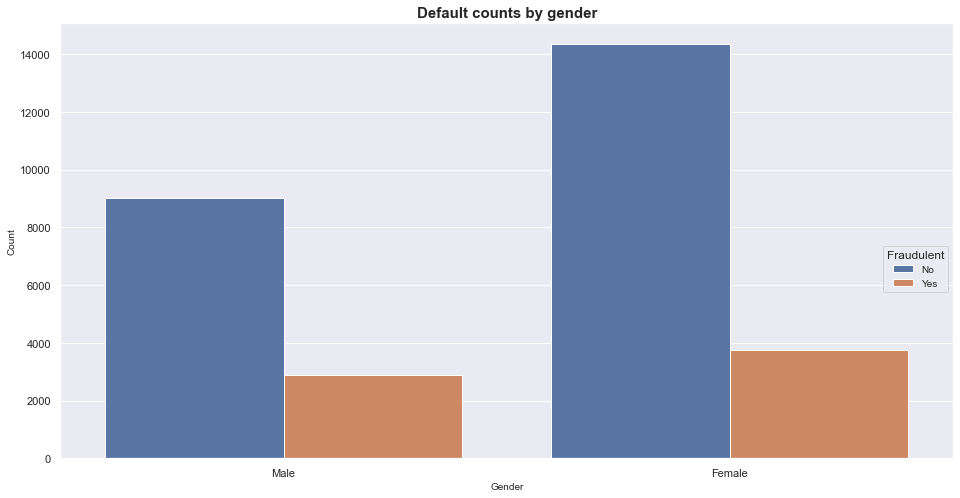

In [6]:
plt.figure(figsize = (16,8))
ax_gender = sns.countplot(data = data, hue = 'Y', x = 'X2')
plt.title('Default counts by gender', fontsize=15, weight = 'bold')
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(ticks = [0,1], labels = ['Male', 'Female'])
plt.legend(bbox_to_anchor=(1,0.5), title='Fraudulent', fontsize=10, labels=['No','Yes'])
plt.show()

Average age of defaulters is roughly the same as average age of valid credit card users

In [25]:
data.groupby('Y')['X5'].mean()

Y
0    35.417266
1    35.725738
Name: X5, dtype: float64

Plot distribution of attributes in dataset

AttributeError: 'PolyCollection' object has no property 'warn_singular'

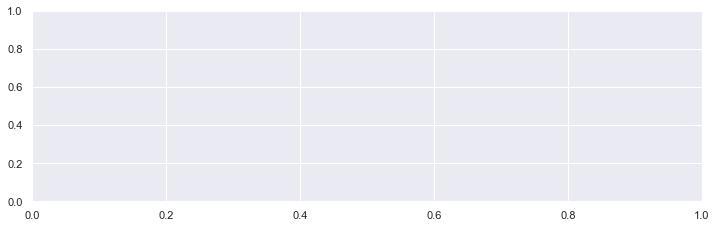

In [26]:
# Plot the distributions of the features
columns = data.iloc[:,0:23].columns
headerdict = {}
for i in range(len(columns.tolist())):
    headerdict[columns.tolist()[i]] = header[i]
plt.figure(figsize=(12,24*4))
grids = gridspec.GridSpec(23, 1)
for grid, index in enumerate(data[columns]):
 ax = plt.subplot(grids[grid])
 sns.kdeplot(x = data[index][data['Y'] == 1], fill = True, color = "pink", warn_singular=False)
 sns.kdeplot(x = data[index][data['Y'] == 0], fill = True, warn_singular=False)
 plt.legend(bbox_to_anchor=(1,0.5), title='Fraudulent', fontsize=10, labels=['Yes','No'])
 ax.set_xlabel("")
 ax.set_title("Distribution of Column: "  + headerdict[index])
plt.show()

Boxplot of attributes to remove outliers

TypeError: set_ticks() got an unexpected keyword argument 'labels'

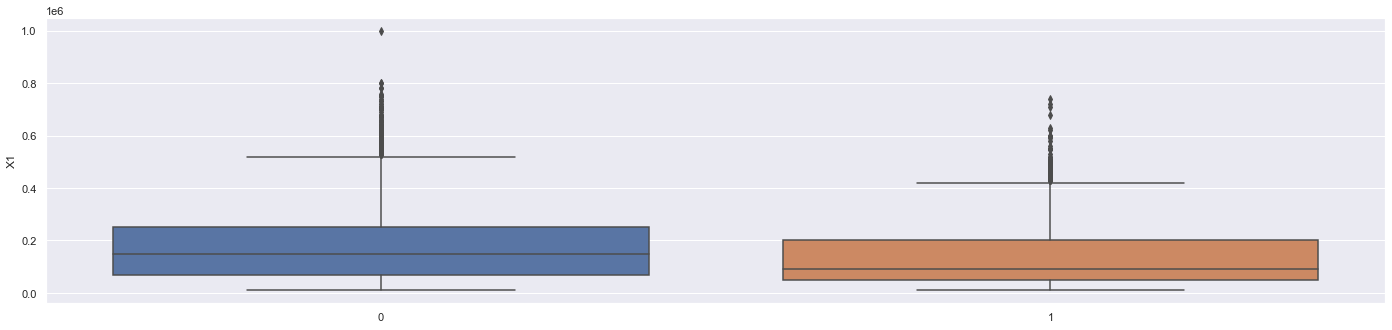

In [27]:
#Boxplots to observe outliers
columns = data.iloc[:,0:23].columns
plt.figure(figsize=(24,36*4))
grids = gridspec.GridSpec(23, 1)
for grid, index in enumerate(data[columns]):
 ax = plt.subplot(grids[grid])
 sns.boxplot(x = "Y", y = index, data = data) 
 ax.set_xlabel("")
 ax.set_xticks(ticks = [0,1], labels = ["Valid", "Fraudulent"])
 ax.set_title("Distribution of Column: "  + headerdict[index], weight = "bold", fontsize = 15)
 sns.despine(offset=10, trim=True) 
plt.show()

Correlation matrix of attributes within the dataset

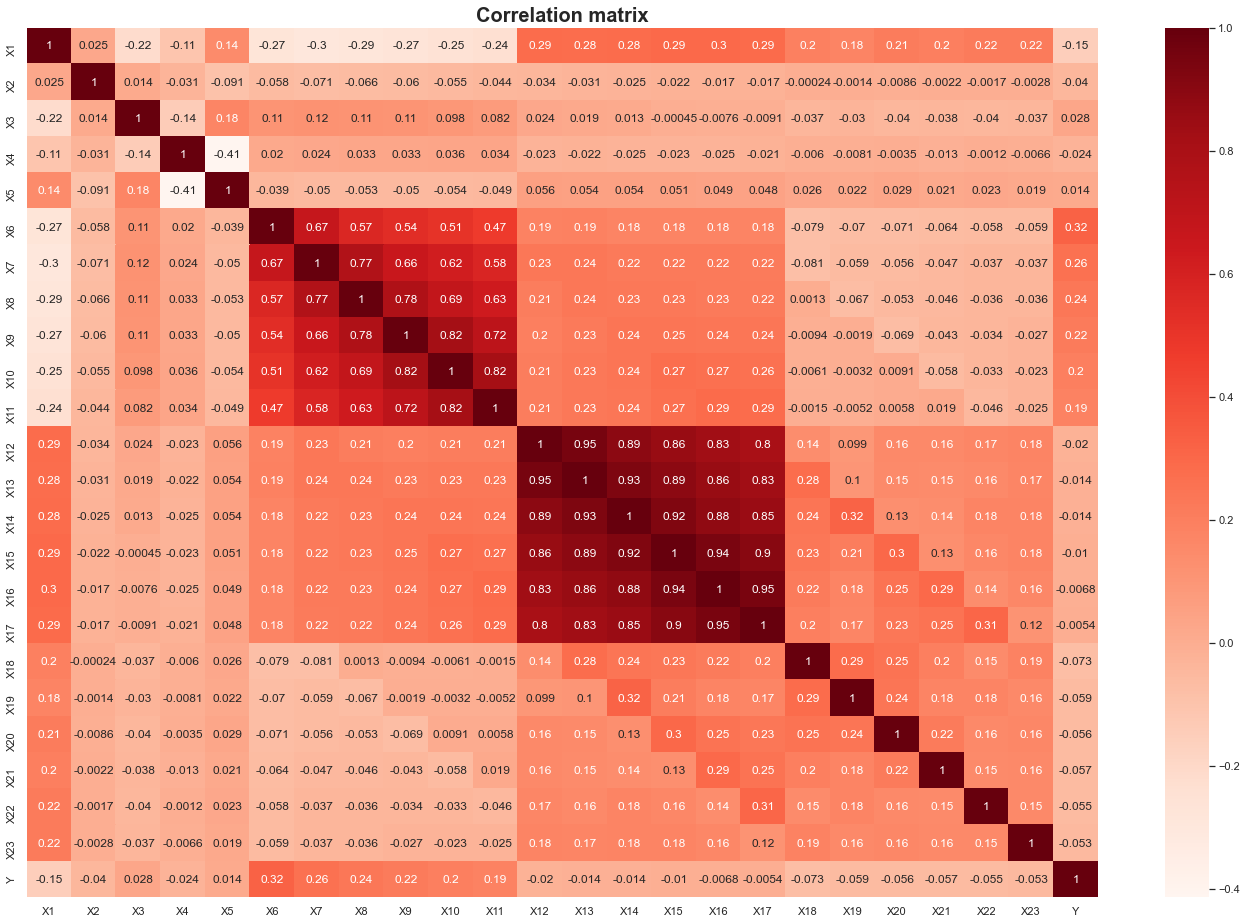

In [28]:
plt.figure(figsize=(24,16))
cor = data.corr()
ax_corr = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
ax_corr.set_title("Correlation matrix", weight = "bold", fontsize = 20)
plt.show()

In [29]:
corr_with_Y = data.corrwith(data['Y']).reindex(data.corrwith(data['Y']).abs().sort_values(ascending = False).index)
print(corr_with_Y)

Y      1.000000
X6     0.324794
X7     0.263551
X8     0.235253
X9     0.216614
X10    0.204149
X11    0.186866
X1    -0.153520
X18   -0.072929
X19   -0.058579
X21   -0.056827
X20   -0.056250
X22   -0.055124
X23   -0.053183
X2    -0.039961
X3     0.028006
X4    -0.024339
X12   -0.019644
X13   -0.014193
X14   -0.014076
X5     0.013890
X15   -0.010156
X16   -0.006760
X17   -0.005372
dtype: float64


# Data Pre Processing

X6, X7, X8, X9, X10 and X11 has a minimum value of -2. Based on the documentation, -2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only). We can group all of them under category 0, which is paid on time/ did not exceed payment schedule.

In [7]:
data.loc[(data.X6 == -2) | (data.X6 == -1), 'X6'] = 0
data.loc[(data.X7 == -2) | (data.X7 == -1), 'X7'] = 0
data.loc[(data.X8 == -2) | (data.X8 == -1), 'X8'] = 0
data.loc[(data.X9 == -2) | (data.X9 == -1), 'X9'] = 0
data.loc[(data.X10 == -2) | (data.X10 == -1), 'X10'] = 0
data.loc[(data.X11 == -2) | (data.X11 == -1), 'X11'] = 0

Based on the UCI documentation for the dataset, `Education` is only supposed to have 4 categories, ranging from 1 to 4. However, in the dataset, we can observe values of 0, 5 and 6. Thus, we will lump all the undocumented and unknown categories into category 4 (others).

In [8]:
data.loc[(data.X3 == 0) | (data.X3 == 5) | (data.X3 == 6), 'X3'] = 4
data.X3.value_counts()

2    14030
1    10585
3     4917
4      468
Name: X3, dtype: int64

Based on the UCI documentation for the dataset, `Marriage` is only supposed to have 3 categories, ranging from 1 to 3. However, in the dataset, we can observe values of 0. Thus, we will lump the undocumented and unknown category into category 3 (others).

In [9]:
data.loc[data.X4 == 0, 'X4'] = 3
data.X4.value_counts()

2    15964
1    13659
3      377
Name: X4, dtype: int64

Data discretisation of `age` variable to reduce it to smaller number of distinct values

In [10]:
data['X5'] = pd.cut(data['X5'], 6, labels = [1,2,3,4,5,6])
data['X5'] = pd.to_numeric(data['X5'])
data.loc[(data['X5'] == 6) , 'X5'] = 5 #Combine group 5 and 6 together

Creating a train test split for the data based on Project specification of 75%/25% train/test split

In [11]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1234)

Scaling of the data using StandardScaler to perform z-index scaling

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_scaled = sc.transform(X)

No categorical encoding has to be done as the data is already one-hot encoded in integer form

# **Support Vector Machine**

# Feature Selection

Wrapper Method: forward and backward selection (Using SVM as classifier)

In [ ]:
classifier = SVC(kernel = 'rbf', random_state = 1234)
classifier.fit(X_train, y_train)

sfs_svm_forward = sfs(classifier, 
           k_features='best', 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0,
           n_jobs = -1) 

sfs_svm_backward = sfs(classifier, 
           k_features='best', 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0,
           n_jobs = -1) 

sfs_svm_forward = sfs_svm_forward.fit(X_train, y_train)
sfs_svm_backward = sfs_svm_backward.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  23 | elapsed:  9.1min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:  9.2min finished

[2022-11-15 23:16:59] Features: 1/23 -- score: 0.8210222222222222[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  22 | elapsed:  2.5min remaining:   23.9s

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  23 | elapsed: 12.0min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed: 12.2min finished

[2022-11-15 23:34:11] Features: 22/1 -- score: 0.8292444444444445[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [9]:
print(sfs_svm_forward.k_feature_idx_)
print(sfs_svm_backward.k_feature_idx_)

print(sfs_svm_forward.k_score_)
print(sfs_svm_backward.k_score_)

NameError: name 'sfs_svm_forward' is not defined

As the backwards elimination feature selection method has a higher prediction score, thus we will use the features from backwards elimination

Features X2, X3, X4, X5, X6, X7, X7, X9, X11, X12, X13, X16, X23 are the best features to keep based on backward elimination with SVM classifier

In [10]:
data_svm_backward = data.loc[:,['X2','X3','X4','X5','X6','X7','X8','X9','X11','X12','X13','X16','X23','Y']]

X_svm_backward = data_svm_backward.iloc[:, :-1].values
y_svm_backward = data_svm_backward.iloc[:, -1].values

X_svm_backward_train, X_svm_backward_test, y_svm_backward_train, y_svm_backward_test = train_test_split(X_svm_backward, y_svm_backward, test_size = 0.25, random_state = 1234)

Rescale the new dataset with only selected features

In [11]:
X_svm_backward_train = sc.fit_transform(X_svm_backward_train)
X_svm_backward_test = sc.transform(X_svm_backward_test)

# Model Selection and Training

Support Vector Machine

We will train two Support Vector Machine classifiers. One standard classifier would not have any penalty on the class weights. The other would be a balanced classifier, with class_weight = 'balanced'. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

In [12]:
classifier_svm_balanced = SVC(kernel = 'rbf', random_state = 1234, class_weight = 'balanced')
classifier_svm_balanced.fit(X_svm_backward_train, y_svm_backward_train)

classifier_svm_backward = SVC(kernel = 'rbf', random_state = 1234)
classifier_svm_backward.fit(X_svm_backward_train, y_svm_backward_train)

SVC(random_state=1234)

# Model Evaluation

Evaluation of the standard SVM model without any penalty to class weights

              precision    recall  f1-score   support

       Valid       0.83      0.95      0.89      5800
  Fraudulent       0.69      0.35      0.46      1700

    accuracy                           0.82      7500
   macro avg       0.76      0.65      0.68      7500
weighted avg       0.80      0.82      0.79      7500



Text(0.5, 1.0, 'Confusion Matrix')

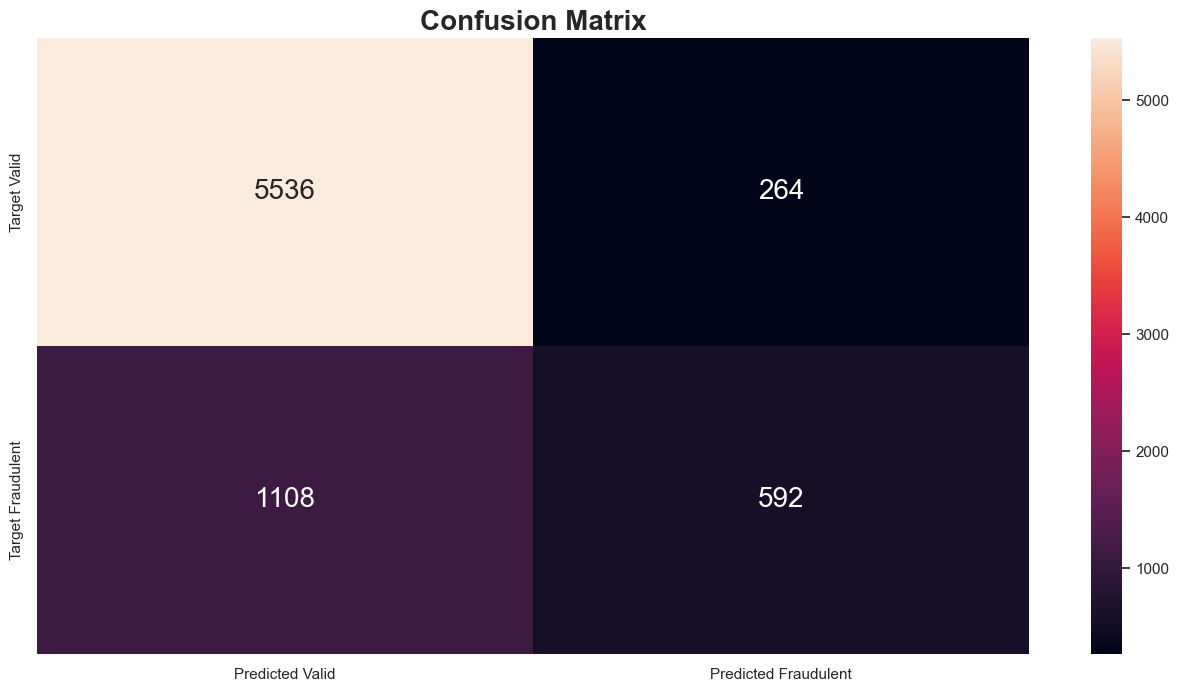

In [26]:
y_pred_svm_backward = classifier_svm_backward.predict(X_svm_backward_test)
cm_svm = confusion_matrix(y_svm_backward_test, y_pred_svm_backward)

print(classification_report(y_svm_backward_test, y_pred_svm_backward, target_names = ['Valid', "Fraudulent"])) #Precision, accuracy, recall and f-1 score for model

cm_svm_df = pd.DataFrame(cm_svm, index=['Target Valid', 'Target Fraudulent'],columns=['Predicted Valid', 'Predicted Fraudulent'])

plt.figure(figsize=(16,8))
sns.heatmap(cm_svm, annot=True, fmt='g',xticklabels=cm_svm_df.columns, yticklabels=cm_svm_df.index, annot_kws={"size": 20})
plt.title("Confusion Matrix", size=20, weight = 'bold')

Evaluation of the balanced SVM model

              precision    recall  f1-score   support

       Valid       0.88      0.79      0.83      5800
  Fraudulent       0.46      0.62      0.53      1700

    accuracy                           0.75      7500
   macro avg       0.67      0.71      0.68      7500
weighted avg       0.78      0.75      0.76      7500



Text(0.5, 1.0, 'Confusion Matrix')

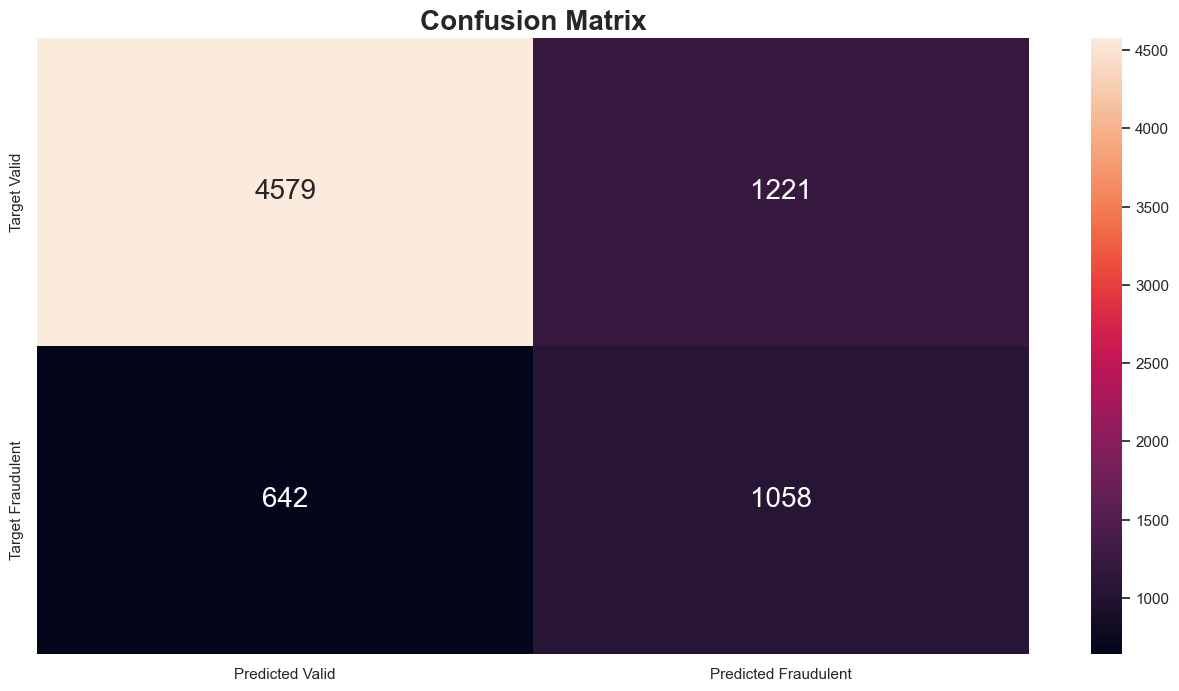

In [27]:
y_pred_svm_balanced = classifier_svm_balanced.predict(X_svm_backward_test)
cm_svm = confusion_matrix(y_svm_backward_test, y_pred_svm_balanced)

print(classification_report(y_svm_backward_test, y_pred_svm_balanced, target_names = ['Valid', "Fraudulent"])) #Precision, accuracy, recall and f-1 score for model

cm_svm_df = pd.DataFrame(cm_svm, index=['Target Valid', 'Target Fraudulent'],columns=['Predicted Valid', 'Predicted Fraudulent'])

plt.figure(figsize=(16,8))
sns.heatmap(cm_svm, annot=True, fmt='g',xticklabels=cm_svm_df.columns, yticklabels=cm_svm_df.index, annot_kws={"size": 20})
plt.title("Confusion Matrix", size=20, weight = 'bold')

ROC and AUROC metrics

In [29]:
fpr_svm_balanced, tpr_svm_balanced, _ = roc_curve(y_svm_backward_test, y_pred_svm_balanced)
auc_svm_balanced = roc_auc_score(y_svm_backward_test, y_pred_svm_balanced)
print("Support Vector Machine (Balanced) Area Under Receiver Operating Characteristic Curve: " + str(auc_svm_balanced))
 
fpr_svm_backward, tpr_svm_backward, _ = roc_curve(y_svm_backward_test, y_pred_svm_backward)
auc_svm_backward = roc_auc_score(y_svm_backward_test, y_pred_svm_backward)
print("Support Vector Machine (Backward) Area Under Receiver Operating Characteristic Curve: " + str(auc_svm_backward))

Support Vector Machine (Forward) Area Under Receiver Operating Characteristic Curve: 0.7059178498985801
Support Vector Machine (Backward) Area Under Receiver Operating Characteristic Curve: 0.6513590263691683


# **Logistic Regression**

# Feature Selection

Wrapper Method: forward and backward selection (Using Logistic Regression as classifier)

In [30]:
classifier_log = LogisticRegression(random_state = 1234)
classifier_log.fit(X_train, y_train)

sfs_log_forward = sfs(classifier_log, 
           k_features='best', 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0,
           n_jobs = -1) 

sfs_log_backward = sfs(classifier_log, 
           k_features='best', 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0,
           n_jobs = -1) 

sfs_log_forward = sfs_log_forward.fit(X_train, y_train)
sfs_log_backward = sfs_log_backward.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  23 | elapsed:    2.7s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  20 out of  23 | elapsed:    3.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    3.0s finished

[2022-11-15 03:18:13] Features: 1/23 -- score: 0.8208888888888889[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  22 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  19 out of  22 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.0s finished

[2022-11-15 03:18:13] Features: 2/23 -- score: 0.8211555555555555[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  21 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel

In [25]:
print(sfs_log_forward.k_feature_idx_)
print(sfs_log_backward.k_feature_idx_)

print(sfs_log_forward.k_score_)
print(sfs_log_backward.k_score_)

(1, 2, 5)
(2, 5)
0.8209333333333333
0.8208888888888889


As the forward selection feature selection method has a higher prediction score, thus we will use the features from forward selection

Features 'X2', 'X3' and 'X6' and are the best features to keep based on forward propogration with Logistic Regression classifier 

In [31]:
data_log_forward = data.loc[:,['X2','X3','X6','Y']]

X_log_forward = data_log_forward.iloc[:, :-1].values
y_log_forward = data_log_forward.iloc[:, -1].values
 
X_log_forward_train, X_log_forward_test, y_log_forward_train, y_log_forward_test = train_test_split(X_log_forward, y_log_forward, test_size = 0.25, random_state = 1234)

Rescale the new dataset with only selected features

In [32]:
X_log_forward_train = sc.fit_transform(X_log_forward_train)
X_log_forward_test = sc.transform(X_log_forward_test)

# Model Selection and Training

Logistic Regression

In [33]:
classifier_log_forward = LogisticRegression(random_state = 1234)
classifier_log_forward.fit(X_log_forward_train, y_log_forward_train)

LogisticRegression(random_state=1234)

# Model Evaluation

Evaluation of the forward selection Logistic Regression model

              precision    recall  f1-score   support

       Valid       0.83      0.96      0.89      5800
  Fraudulent       0.70      0.33      0.45      1700

    accuracy                           0.82      7500
   macro avg       0.76      0.64      0.67      7500
weighted avg       0.80      0.82      0.79      7500



Text(0.5, 1.0, 'Confusion Matrix')

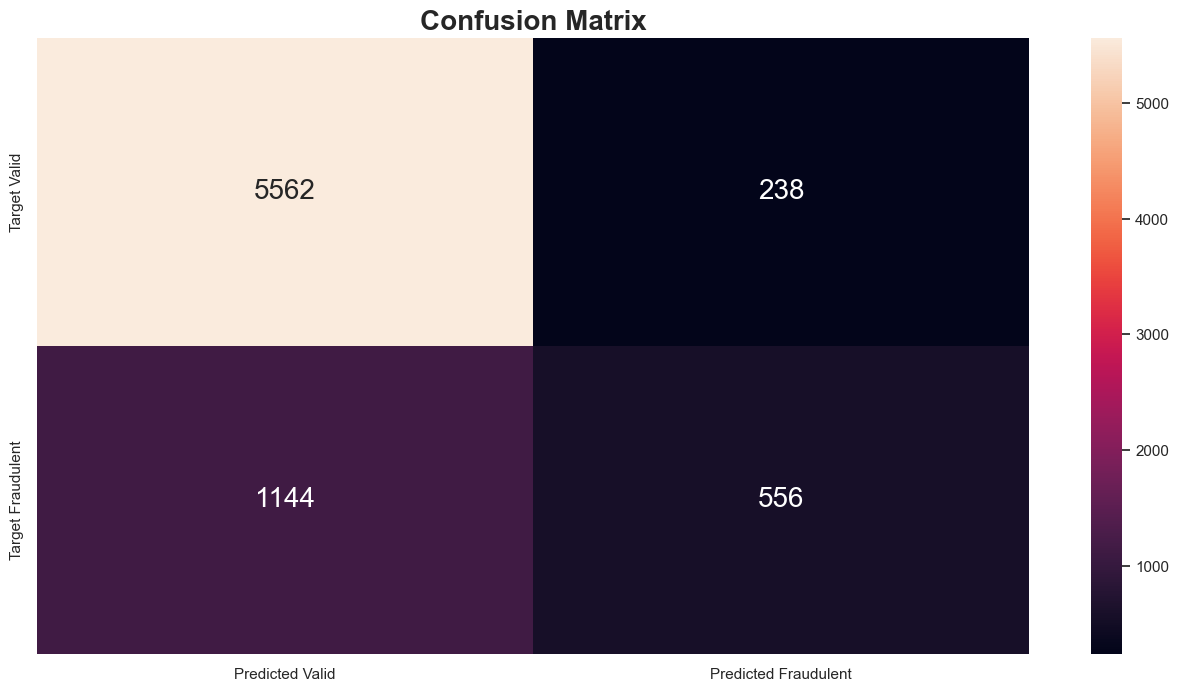

In [34]:
y_pred_log = classifier_log_forward.predict(X_log_forward_test)
cm_log = confusion_matrix(y_log_forward_test, y_pred_log)
 
print(classification_report(y_log_forward_test, y_pred_log, target_names = ['Valid', "Fraudulent"])) #Precision, accuracy, recall and f-1 score for model
 
cm_log_df = pd.DataFrame(cm_log, index=['Target Valid', 'Target Fraudulent'],columns=['Predicted Valid', 'Predicted Fraudulent'])
 
plt.figure(figsize=(16,8))
sns.heatmap(cm_log, annot=True, fmt='g',xticklabels=cm_log_df.columns, yticklabels=cm_log_df.index, annot_kws={"size": 20})
plt.title("Confusion Matrix", size=20, weight = 'bold')

ROC and AUROC metrics

In [35]:
fpr_log_forward, tpr_log_forward, _ = roc_curve(y_log_forward_test, y_pred_log)
auc_log_forward = roc_auc_score(y_log_forward_test, y_pred_log)
print("Logistic Regression (Forward) Area Under Receiver Operating Characteristic Curve: " + str(auc_log_forward))

Logistic Regression (Forward) Area Under Receiver Operating Characteristic Curve: 0.6430121703853956


# **Decision Tree** 

# Feature Selection

Wrapper Method: forward and backward selection (Using Decision Tree as classifier)

In [36]:
classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 1234)
classifier_tree.fit(X_train, y_train)
 
sfs_tree_forward = sfs(classifier_tree,
           k_features='best',
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=0,
           n_jobs = -1)
 
sfs_tree_backward = sfs(classifier_tree,
           k_features='best',
           forward=False,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=0,
           n_jobs = -1)
 
sfs_tree_forward = sfs_tree_forward.fit(X_train, y_train)
sfs_tree_backward = sfs_tree_backward.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  23 | elapsed:    0.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  20 out of  23 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.4s finished

[2022-11-15 03:18:59] Features: 1/23 -- score: 0.9379555555555555[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  22 | elapsed:    0.3s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  19 out of  22 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.3s finished

[2022-11-15 03:19:00] Features: 2/23 -- score: 0.9786666666666667[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  21 | elapsed:    0.3s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:    0.3s remaining:    0.1s
[Parallel

In [37]:
print(sfs_tree_forward.k_feature_idx_)
print(sfs_tree_backward.k_feature_idx_)

print(sfs_tree_forward.k_score_)
print(sfs_tree_backward.k_score_)

(0, 1, 2, 3, 4, 5, 11, 12, 13, 14, 16, 22)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22)
0.9977777777777778
0.9977777777777778


As both forward selection and backwards elimination have the same prediction score, we will use backwards elimination as more features are retained.

Features 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23' are the best features to keep based on backward propogation with Decision Tree classifier

In [13]:
data_tree_backward = data.loc[:,['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23','Y']]
 
X_tree_backward = data_tree_backward.iloc[:, :-1].values
y_tree_backward = data_tree_backward.iloc[:, -1].values

X_tree_backward_train, X_tree_backward_test, y_tree_backward_train, y_tree_backward_test = train_test_split(X_tree_backward, y_tree_backward, test_size = 0.25, random_state = 1234)

Rescale the new dataset with only selected features

In [14]:
X_tree_backward_train = sc.fit_transform(X_tree_backward_train)
X_tree_backward_test = sc.transform(X_tree_backward_test)

# Model Selection and Training

In [40]:
classifier_tree_backward = DecisionTreeClassifier(criterion = 'entropy', random_state = 1234)
classifier_tree_backward.fit(X_tree_backward_train, y_tree_backward_train)

DecisionTreeClassifier(criterion='entropy', random_state=1234)

# Model Evaluation

Evaluation of the backward propogation Decision Tree Classifier model

              precision    recall  f1-score   support

       Valid       0.83      0.83      0.83      5800
  Fraudulent       0.41      0.41      0.41      1700

    accuracy                           0.73      7500
   macro avg       0.62      0.62      0.62      7500
weighted avg       0.73      0.73      0.73      7500



Text(0.5, 1.0, 'Confusion Matrix')

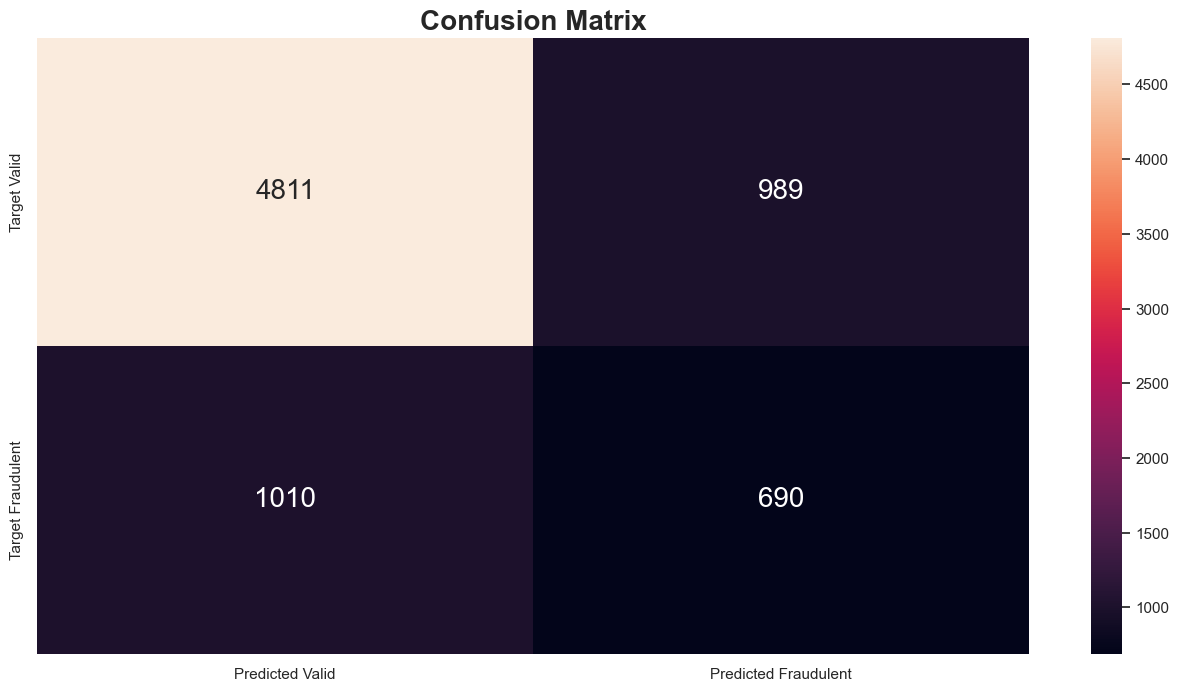

In [41]:
y_pred_tree = classifier_tree_backward.predict(X_tree_backward_test)
cm_tree = confusion_matrix(y_tree_backward_test, y_pred_tree)
 
print(classification_report(y_tree_backward_test, y_pred_tree, target_names = ['Valid', "Fraudulent"])) #Precision, accuracy, recall and f-1 score for model
 
cm_tree_df = pd.DataFrame(cm_tree, index=['Target Valid', 'Target Fraudulent'],columns=['Predicted Valid', 'Predicted Fraudulent'])
 
plt.figure(figsize=(16,8))
sns.heatmap(cm_tree, annot=True, fmt='g',xticklabels=cm_tree_df.columns, yticklabels=cm_tree_df.index, annot_kws={"size": 20})
plt.title("Confusion Matrix", size=20, weight = 'bold')

ROC and AUROC metrics

In [42]:
fpr_tree_backward, tpr_tree_backward, _ = roc_curve(y_tree_backward_test, y_pred_tree)
auc_tree_backward = roc_auc_score(y_tree_backward_test, y_pred_tree)
print("Decision Tree (Backward) Area Under Receiver Operating Characteristic Curve: " + str(auc_tree_backward))

Decision Tree (Backward) Area Under Receiver Operating Characteristic Curve: 0.617682555780933


Plot of Overall ROC curve

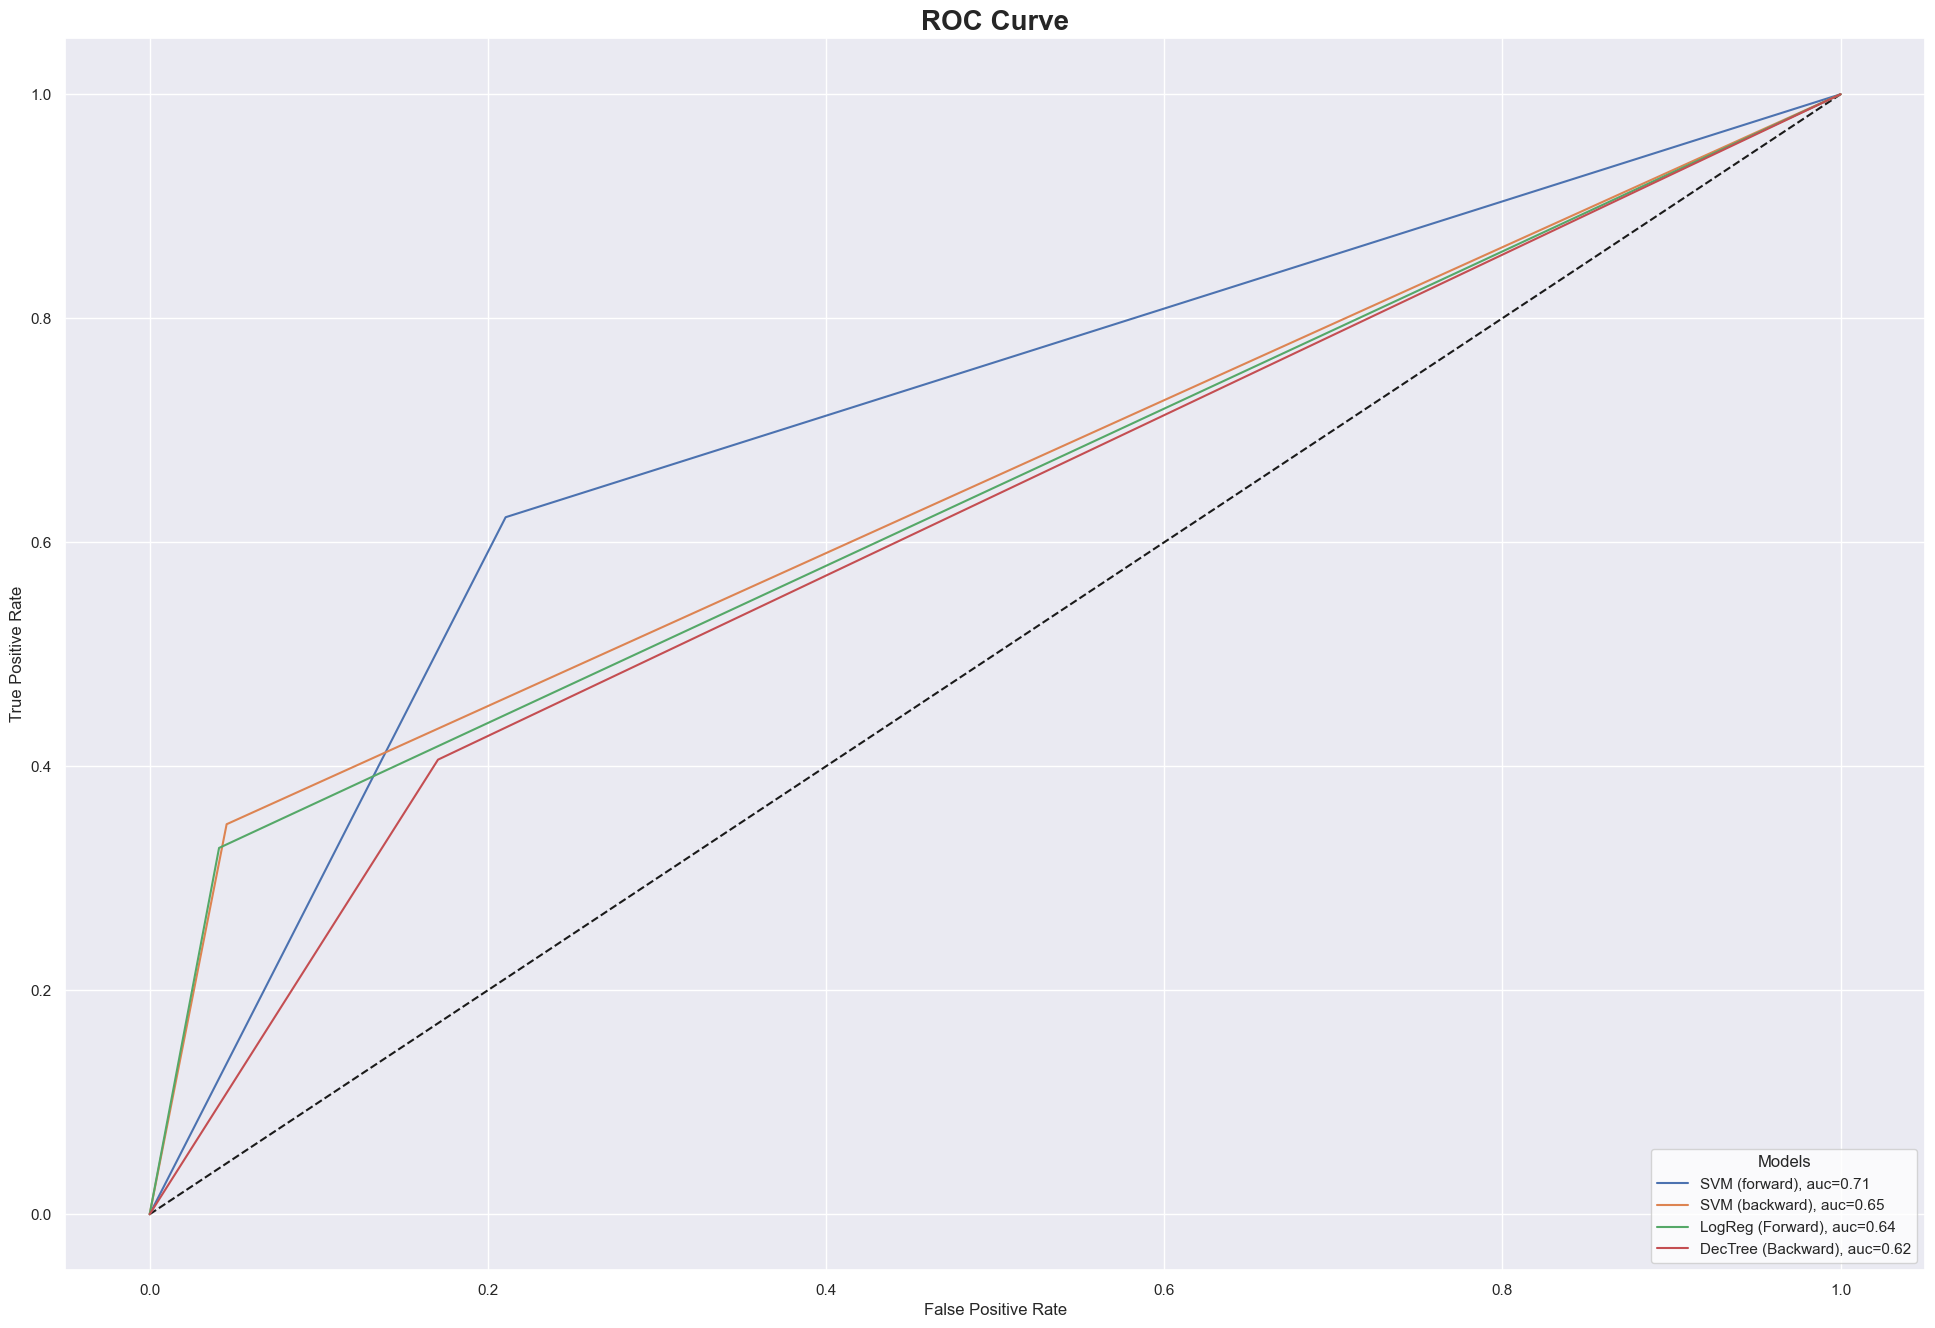

In [43]:
plt.figure(figsize=(24,16))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svm_balanced,tpr_svm_balanced,label="SVM (forward), auc="+str(round(auc_svm_balanced,2))) #Plot SVM (Forward)
plt.plot(fpr_svm_backward,tpr_svm_backward,label="SVM (backward), auc="+str(round(auc_svm_backward,2))) #Plot SVM (Backward)
plt.plot(fpr_log_forward,tpr_log_forward,label="LogReg (Forward), auc="+str(round(auc_log_forward,2))) #Plot Logistic Regression (Forward)
plt.plot(fpr_tree_backward,tpr_tree_backward,label="DecTree (Backward), auc="+str(round(auc_tree_backward,2))) #Plot Decision Tree (Backward)

plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size=20, weight = 'bold')
plt.show()

# Characteristics of Support Vector Machine
Based on average class accuracy, f-1 score and Area Under ROC curve, we have determined that the best classifier for the dataset would be the Support Vector Machine (SVM).

We will take a deeper look into the Support Vector Machine.

As backward propogation for feature selection produced slightly better results for the `Fraudulent` class, we will focus on backward propogation for feature selection of the Support Vector Machine.

Characteristics of standard SVM classifier

In [44]:
print(classifier_svm_backward.support_vectors_.shape)

print(classifier_svm_backward.intercept_)

print(classifier_svm_backward.n_features_in_)

print(classifier_svm_backward.class_weight_)

(9556, 13)
[-0.32771405]
13
[1. 1.]


9,556 samples out of the 22,500 training samples are used as support vectors

-0.32771405 is the intercept of the support vector machine

All 13 features input were used in the support vector machine

Class weights of 1 for `Valid` and 1 for `Fraudulent` were used

Characteristic of balanced SVM classifier

In [45]:
print(classifier_svm_balanced.support_vectors_.shape)

print(classifier_svm_balanced.intercept_)

print(classifier_svm_balanced.n_features_in_)

print(classifier_svm_balanced.class_weight_)

(14407, 13)
[0.10715166]
13
[0.64051469 2.27917342]


14,407 samples out of the 22,500 training samples are used as support vectors

0.10715166 is the intercept of the support vector machine

All 13 features input were used in the support vector machine

Class weights of 0.64051469 for `Valid` and 2.27917342 for `Fraudulent` were used

# K-fold cross validation

SVM using cross validation

In [13]:
classifier_svm_balanced_cross = SVC(kernel = 'rbf', random_state = 1234, class_weight = 'balanced')

results_svm = cross_validate(estimator= classifier_svm_balanced_cross, X = X_scaled, y= y, cv = 10, scoring= ['accuracy', 'precision', 'recall', 'f1'], return_train_score=False)

In [24]:
print("Validation Accuracy scores: {}, Validation Precision scores: {}, Validation Recall scores: {}, Validation F1 scores: {}"
      .format(results_svm['test_accuracy'],results_svm['test_precision'], results_svm['test_recall'], results_svm['test_f1']))
    

Validation Accuracy scores: [0.741      0.75433333 0.75233333 0.742      0.765      0.754
 0.78066667 0.76133333 0.77633333 0.763     ], Validation Precision scores: [0.43586833 0.45628743 0.45433526 0.43834081 0.47613504 0.46105263
 0.50289017 0.46666667 0.49493671 0.47122302], Validation Recall scores: [0.57831325 0.57379518 0.59186747 0.58885542 0.61596386 0.65963855
 0.6561086  0.55957768 0.58974359 0.59276018], Validation F1 scores: [0.49708738 0.50833889 0.51406148 0.50257069 0.53709783 0.54275093
 0.56937173 0.50891632 0.53819683 0.5250501 ]


Logistic Regression using cross validation

In [28]:
classifier_log_forward_cross = LogisticRegression(random_state = 1234)

results_log = cross_validate(estimator= classifier_log_forward_cross, X = X_scaled, y= y, cv = 10, scoring= ['accuracy', 'precision', 'recall', 'f1'], return_train_score=False)

In [30]:
print("Validation Accuracy scores: {}, Validation Precision scores: {}, Validation Recall scores: {}, Validation F1 scores: {}"
      .format(results_log['test_accuracy'],results_log['test_precision'], results_log['test_recall'], results_log['test_f1']))

Validation Accuracy scores: [0.80366667 0.80666667 0.80933333 0.80666667 0.81966667 0.82833333
 0.83033333 0.82666667 0.82633333 0.823     ], Validation Precision scores: [0.62057878 0.63043478 0.63690476 0.63291139 0.6952381  0.68956743
 0.71751412 0.76190476 0.73666667 0.7260274 ], Validation Recall scores: [0.29066265 0.30572289 0.32228916 0.30120482 0.32981928 0.40813253
 0.38310709 0.31372549 0.33333333 0.31975867], Validation F1 scores: [0.39589744 0.41176471 0.428      0.40816327 0.4473953  0.512772
 0.49950836 0.44444444 0.45898235 0.44397906]


Decision Tree Regression using cross validation

In [31]:
classifier_tree_backward_cross = DecisionTreeClassifier(criterion = 'entropy', random_state = 1234)

results_tree = cross_validate(estimator= classifier_tree_backward_cross, X = X_scaled, y= y, cv = 10, scoring= ['accuracy', 'precision', 'recall', 'f1'], return_train_score=False)

In [32]:
print("Validation Accuracy scores: {}, Validation Precision scores: {}, Validation Recall scores: {}, Validation F1 scores: {}"
      .format(results_tree['test_accuracy'],results_tree['test_precision'], results_tree['test_recall'], results_tree['test_f1']))

Validation Accuracy scores: [0.71266667 0.717      0.71866667 0.71766667 0.721      0.74066667
 0.739      0.73566667 0.745      0.74166667], Validation Precision scores: [0.36438356 0.36953456 0.37068966 0.37309293 0.38294993 0.41971831
 0.41428571 0.39906832 0.42201835 0.41540785], Validation Recall scores: [0.40060241 0.39457831 0.38855422 0.40512048 0.42620482 0.44879518
 0.43740573 0.38763198 0.41628959 0.4147813 ], Validation F1 scores: [0.38163558 0.38164603 0.37941176 0.38844765 0.40342124 0.43377001
 0.42553191 0.39326702 0.4191344  0.41509434]
